# Homework 1
## Initial Set-Up:

In [1]:
# Read in data manipulation packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use for data-preprocessing
wine_dat = pd.read_csv('./wine_modified.csv')
print('Wine modified dimensions:', wine_dat.shape)
wine_dat.head()

# Use for remaining sections
X_train = pd.read_csv('./wine_train_data.csv')
y_train = pd.read_csv('./wine_train_labels.csv')
X_valid = pd.read_csv('./wine_val_data.csv')
y_valid = pd.read_csv('./wine_val_labels.csv')
X_test = pd.read_csv('./wine_test_data.csv')
y_test = pd.read_csv('./wine_test_labels.csv')
print('Traning data dimensions:',X_train.shape)
print('Number of rows of training:', X_train.shape[0])
print('Number of rows of validation:', X_valid.shape[0])
print('Number of rows of testing:', X_test.shape[0])

Wine modified dimensions: (178, 14)
Traning data dimensions: (100, 13)
Number of rows of training: 100
Number of rows of validation: 39
Number of rows of testing: 39


## Data Preprocessing:

Problem 1:

In [4]:
# Where are the missing values?
wine_dat.isnull().sum()

class                    10
Alcohol                   0
Malic acid               12
Ash                     112
Alcalinity of ash        12
Magnesium                22
Total phenols             0
Flavanoids               48
Nonflavanoid phenols     14
Proanthocyanins          12
Color intensity          12
Hue                      14
OD280/OD315              11
Proline                  14
dtype: int64

In [25]:
# Remove NaN in Class
wine_clean = wine_dat.dropna(subset=['class'])
# Remove Rows with > 7 missing
wine_clean = wine_clean.dropna(thresh=wine_clean.shape[1]-7)
# Report new number of rows
print('New number of rows:',wine_clean.shape[0])

New number of rows: 154


Problem 2:

In [26]:
# Detect breakdown of missing values
wine_clean.isnull().sum()/wine_clean.shape[0]

class                   0.000000
Alcohol                 0.000000
Malic acid              0.000000
Ash                     0.616883
Alcalinity of ash       0.000000
Magnesium               0.058442
Total phenols           0.000000
Flavanoids              0.227273
Nonflavanoid phenols    0.000000
Proanthocyanins         0.000000
Color intensity         0.000000
Hue                     0.000000
OD280/OD315             0.000000
Proline                 0.000000
dtype: float64

In [27]:
# Remove ash
wine_clean.drop('Ash', axis=1, inplace=True)
# Print new shape
print('New data dimensions:',wine_clean.shape)
print('Removed Ash feature')

New data dimensions: (154, 13)
Removed Ash feature


In [28]:
# Fill in missing data with mean
features_detect = wine_clean.columns[pd.isnull(wine_clean).sum() > 0].tolist()
print(features_detect,'are features with missing values')
wine_clean = wine_clean.fillna(wine_clean.mean())
print('New standard deviations are:')
wine_clean[features_detect].std()

['Magnesium', 'Flavanoids'] are features with missing values
New standard deviations are:


Magnesium     14.440377
Flavanoids     0.873573
dtype: float64

Problem 3:

In [31]:
# Remove rows that are within 3 standard deviations (~99.7%) of the data.
wine_clean = wine_clean[np.abs(wine_clean.Alcohol - wine_clean.Alcohol.mean()) <= (3*wine_clean.Alcohol.std())]
wine_clean = wine_clean[np.abs(wine_clean.Proline - wine_clean.Proline.mean()) <= (3*wine_clean.Proline.std())]
print('Final dimensions are:',wine_clean.shape)

Final dimensions are: (148, 13)


While there are many different ways to classify an individual data point as an outlier, the most straightforward and indisputable approach is to remove rows where the value is above or below 3 standard deviations of the data. This value would need to be more extreme than 99.7% of the rest of the data. Hence, the data point is pretty safe to be classified as an outlier and removed.

## Decision Trees:

Problem 4:

In [4]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

# For final predictions:
X_train_fin = pd.concat([X_train,X_valid],ignore_index=True)
y_train_fin = pd.concat([y_train,y_valid],ignore_index=True)

best_acc = 0
computations = ['gini', 'entropy']

for i in computations:
    clf = DecisionTreeClassifier(i)
    clf.fit(X_train, y_train)
    accuracy = np.sum(clf.predict(X_valid)==y_valid['class'].values)*1/len(y_valid['class'].values)
    print('For criterion =', i, 'the validation accuracy = ' + str(accuracy))
    if (accuracy > best_acc):
        best_acc = accuracy
        best_computation = i
print("")
print('The best criterion is', best_computation, 'with a validation accuracy of', best_acc)

clf = DecisionTreeClassifier(criterion=best_computation)
clf.fit(X_train_fin, y_train_fin)
predictions = clf.predict(X_test)
fin_accuracy = np.sum(predictions==y_test['class'].values)*1/len(y_test['class'].values)
print('\n')
print('Final accuracy on total training data = ' + str(fin_accuracy))

For criterion = gini the validation accuracy = 0.948717948718
For criterion = entropy the validation accuracy = 0.974358974359

The best criterion is entropy with a validation accuracy of 0.974358974359


Final accuracy on total training data = 0.820512820513


Problem 5:

In [13]:
best_acc = 0
min_sample = [2,5,10,20]

for i in min_sample:
    clf = DecisionTreeClassifier(best_computation,min_samples_split=i)
    clf.fit(X_train, y_train)
    accuracy = np.sum(clf.predict(X_valid)==y_valid['class'].values)*1/len(y_valid['class'].values)
    print('For min sample =', i, 'the validation accuracy = ' + str(accuracy))
    if (accuracy > best_acc):
        best_acc = accuracy
        best_sample = i
print("")
print('The best sample is', best_sample, 'with a validation accuracy of', best_acc)

clf = DecisionTreeClassifier(criterion=best_computation,min_samples_split = best_sample)
clf.fit(X_train_fin, y_train_fin)
predictions = clf.predict(X_test)
fin_accuracy = np.sum(predictions==y_test['class'].values)*1/len(y_test['class'].values)
print('\n')
print('Final accuracy = ' + str(fin_accuracy))

For min sample = 2 the validation accuracy = 0.948717948718
For min sample = 5 the validation accuracy = 0.948717948718
For min sample = 10 the validation accuracy = 0.923076923077
For min sample = 20 the validation accuracy = 0.948717948718

The best sample is 2 with a validation accuracy of 0.948717948718


Final accuracy = 0.820512820513


Problem 6:

In [15]:
sample_size = [20,40,60,80,100]
acc_list = []

for i in sample_size:
    clf = DecisionTreeClassifier(best_computation,min_samples_split=best_sample)
    clf.fit(X_train[:i], y_train[:i])
    accuracy = np.sum(clf.predict(X_valid)==y_valid['class'].values)*1/len(y_valid['class'].values)
    print('For training data sample size =', i, 'the validation accuracy = ' + str(accuracy))
    acc_list.append(accuracy)

For training data sample size = 20 the validation accuracy = 0.641025641026
For training data sample size = 40 the validation accuracy = 0.846153846154
For training data sample size = 60 the validation accuracy = 0.871794871795
For training data sample size = 80 the validation accuracy = 0.871794871795
For training data sample size = 100 the validation accuracy = 0.948717948718


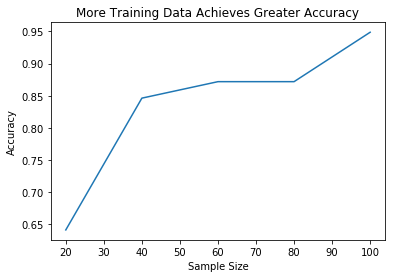

In [21]:
# Generate Line Plot
plt.plot(sample_size,acc_list)

# Label the axes
plt.xlabel('Sample Size')
plt.ylabel('Accuracy')

#Figure Title
plt.title('More Training Data Achieves Greater Accuracy')

plt.show()

## KNN

Problem 7:

In [22]:
# Use Standard Scaler from Sklearn to normalize data in full training data:
normalize = preprocessing.StandardScaler().fit(X_train_fin)
X_train_fin_norm = normalize.transform(X_train_fin)

# Apply normalizing of aggregate training set to other data-sets:
X_train_norm = normalize.transform(X_train)
X_valid_norm = normalize.transform(X_valid)
X_test_norm = normalize.transform(X_test)

In [28]:
# Build KNN classifier
clf = KNeighborsClassifier(n_neighbors=3,metric = 'euclidean')
clf.fit(X_train_fin_norm, y_train_fin.values.ravel())
predictions = clf.predict(X_test_norm)
accuracy = np.sum(predictions == y_test['class'].values)*1.0/len(y_test['class'].values)
print('Test accuracy with k = 3 is', accuracy)

Test accuracy with k = 3 is 0.871794871795


Problem 8:

In [31]:
best_acc = 0
dist_metric = ['euclidean','manhattan','chebyshev']

for i in dist_metric:
    clf = KNeighborsClassifier(n_neighbors=3,metric = i)
    clf.fit(X_train_norm, y_train)
    accuracy = np.sum(clf.predict(X_valid_norm)==y_valid['class'].values)*1/len(y_valid['class'].values)
    print('For distance metric =', i, 'the validation accuracy = ' + str(accuracy))
    if (accuracy > best_acc):
        best_acc = accuracy
        best_dist = i
print("")
print('The best distance metric is', best_dist, 'with a validation accuracy of', best_acc)

clf = KNeighborsClassifier(n_neighbors=3,metric = best_dist)
clf.fit(X_train_fin_norm, y_train_fin.values.ravel())
predictions = clf.predict(X_test_norm)
fin_accuracy = np.sum(predictions==y_test['class'].values)*1/len(y_test['class'].values)
print('\n')
print('Final accuracy = ' + str(fin_accuracy))

For distance metric = euclidean the validation accuracy = 0.923076923077
For distance metric = manhattan the validation accuracy = 0.948717948718
For distance metric = chebyshev the validation accuracy = 0.923076923077

The best distance metric is manhattan with a validation accuracy of 0.948717948718


Final accuracy = 0.974358974359


/Users/kkannapp/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Problem 9:

In [32]:
k_list = [1,3,5,7,9]
acc_list = []
best_acc = 0

for i in k_list:
    clf = KNeighborsClassifier(n_neighbors=i,metric = 'euclidean')
    clf.fit(X_train_norm, y_train)
    accuracy = np.sum(clf.predict(X_valid_norm)==y_valid['class'].values)*1/len(y_valid['class'].values)
    print('For k =', i, 'the validation accuracy = ' + str(accuracy))
    acc_list.append(accuracy)
    if (accuracy > best_acc):
        best_acc = accuracy
        best_k = i
print("")
print('The best k-value is', best_k, 'with a validation accuracy of', best_acc)

clf = KNeighborsClassifier(n_neighbors=best_k,metric = 'euclidean')
clf.fit(X_train_fin_norm, y_train_fin.values.ravel())
predictions = clf.predict(X_test_norm)
fin_accuracy = np.sum(predictions==y_test['class'].values)*1/len(y_test['class'].values)
print('\n')
print('Final accuracy = ' + str(fin_accuracy))

For k = 1 the validation accuracy = 0.948717948718
For k = 3 the validation accuracy = 0.923076923077
For k = 5 the validation accuracy = 0.948717948718
For k = 7 the validation accuracy = 0.974358974359
For k = 9 the validation accuracy = 0.948717948718

The best k-value is 7 with a validation accuracy of 0.974358974359


Final accuracy = 0.923076923077


/Users/kkannapp/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


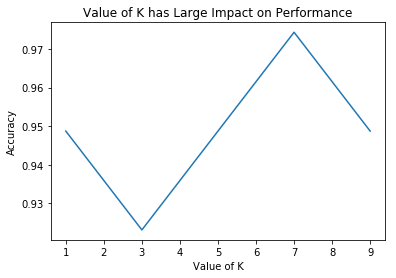

In [34]:
# Generate Line Plot
plt.plot(k_list,acc_list)

# Label the axes
plt.xlabel('Value of K')
plt.ylabel('Accuracy')

#Figure Title
plt.title('Value of K has Large Impact on Performance')

plt.show()

Problem 10:

In [36]:
sample_size = [20,40,60,80,100]
acc_list = []

for i in sample_size:
    clf = KNeighborsClassifier(n_neighbors=3,metric = 'euclidean')
    clf.fit(X_train_norm[:i], y_train[:i])
    accuracy = np.sum(clf.predict(X_valid_norm)==y_valid['class'].values)*1/len(y_valid['class'].values)
    print('For sample size =', i, 'the validation accuracy = ' + str(accuracy))
    acc_list.append(accuracy)

For sample size = 20 the validation accuracy = 0.948717948718
For sample size = 40 the validation accuracy = 1.0
For sample size = 60 the validation accuracy = 1.0
For sample size = 80 the validation accuracy = 1.0
For sample size = 100 the validation accuracy = 0.923076923077


/Users/kkannapp/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


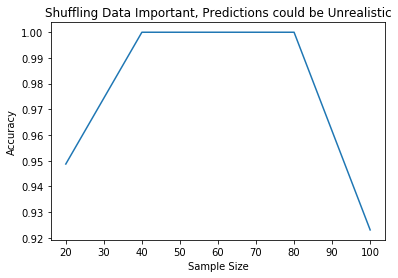

In [37]:
# Generate Line Plot
plt.plot(sample_size,acc_list)

# Label the axes
plt.xlabel('Sample Size')
plt.ylabel('Accuracy')

#Figure Title
plt.title('Shuffling Data Important, Predictions could be Unrealistic')

plt.show()